<a href="https://colab.research.google.com/github/aykb/Group-project-hand-in-/blob/main/challenge1_data_cleaning_finalized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Setup
# If you run this in Google Colab, you can uncomment the next line to ensure dependencies are available.
!pip install -q pandas numpy matplotlib scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

plt.rcParams['figure.figsize'] = (10, 4)



# Challenge 1 – Data Cleaning & Outlier Detection for Smart-City Energy

In this challenge, you will clean and explore a real smart-city energy dataset and use **k-means clustering** to detect atypical days (potential outliers) for several buildings.

**Dataset (hourly energy)**  
We will use the *Household Data* package from **Open Power System Data** (OPSD), 60-minute resolution:

- Package page: https://data.open-power-system-data.org/household_data/2020-04-15/
- Direct CSV (60‑minute, single index):  
  `https://data.open-power-system-data.org/household_data/2020-04-15/household_data_60min_singleindex.csv`

We will:

1. Load the 60-minute household data into a pandas DataFrame.
2. Perform basic data-quality checks and handle missing values from a statistical perspective.
3. Aggregate hourly consumption to daily indicators for a few buildings.
4. Use **k-means** to cluster daily profiles and flag potential outlier days.
5. Export a **tidy daily dataset** for the next challenges.

Cells marked with **`TODO`** are intentionally incomplete and should be implemented by you.



## 1. Load the OPSD household data

Use the URL below to load the **60-minute single-index** CSV file into a DataFrame called `df`.

Then:

- Parse the `utc_timestamp` column as a datetime.
- Set `utc_timestamp` as the DataFrame index.
- Display the shape, a sample of rows, and basic info (`df.info()`).



In [ ]:
DATA_URL = "https://data.open-power-system-data.org/household_data/2020-04-15/household_data_60min_singleindex.csv"

# TODO: load the CSV into a DataFrame named df
# Hint: use pd.read_csv with parse_dates=['utc_timestamp']

df = pd.read_csv(DATA_URL, parse_dates=['utc_timestamp'])

# TODO: set utc_timestamp as index and inspect the data
df = df.set_index('utc_timestamp')

# Quick inspection
# TODO: uncomment once df is defined
print(df.shape)
display(df.head())
df.info()

(38454, 70)


,cet_cest_timestamp,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_grid_import,DE_KN_industrial2_pv,DE_KN_industrial2_storage_charge,DE_KN_industrial2_storage_decharge,DE_KN_industrial3_area_offices,DE_KN_industrial3_area_room_1,...,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine,DE_KN_residential6_circulation_pump,DE_KN_residential6_dishwasher,DE_KN_residential6_freezer,DE_KN_residential6_grid_export,DE_KN_residential6_grid_import,DE_KN_residential6_pv,DE_KN_residential6_washing_machine,interpolated
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2014-12-11 17:00:00+00:00,2014-12-11T18:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-11 18:00:00+00:00,2014-12-11T19:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-11 19:00:00+00:00,2014-12-11T20:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-11 20:00:00+00:00,2014-12-11T21:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-11 21:00:00+00:00,2014-12-11T22:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38454 entries, 2014-12-11 17:00:00+00:00 to 2019-05-01 22:00:00+00:00
Data columns (total 70 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   cet_cest_timestamp                   38454 non-null  object 
 1   DE_KN_industrial1_grid_import        16434 non-null  float64
 2   DE_KN_industrial1_pv_1               17288 non-null  float64
 3   DE_KN_industrial1_pv_2               17288 non-null  float64
 4   DE_KN_industrial2_grid_import        11279 non-null  float64
 5   DE_KN_industrial2_pv                 12000 non-null  float64
 6   DE_KN_industrial2_storage_charge     9754 non-null   float64
 7   DE_KN_industrial2_storage_decharge   9754 non-null   float64
 8   DE_KN_industrial3_area_offices       14360 non-null  float64
 9   DE_KN_industrial3_area_room_1        14360 non-null  float64
 10  DE_KN_industrial3_area_room_2        14360 non-

## 2. Data-quality checks & missing values

1. Compute the fraction of missing values per column.  
2. Identify columns with the largest proportion of missing data.  
3. Decide on a reasonable strategy (drop columns, drop rows, or impute) and apply it.

Remember to justify your choice in comments: we are taking a **statistical perspective** on data quality.



In [ ]:
# TODO: compute missing-value ratios per column
# Example:
na_ratio = df.isna().mean().sort_values(ascending=False)
display(na_ratio.head(10))

# TODO: choose and implement a strategy to handle missing data
# For example: drop columns with too many missing values,
# then fill remaining NaNs with interpolation or forward-fill.

# Strategy: Drop columns with more than 50% missing values, then forward-fill remaining NaNs.
# This statistical approach is suitable given the time-series nature of the data
# and the goal of outlier detection, where too many NaNs could skew analysis.
missing_threshold = 0.5
columns_to_drop = na_ratio[na_ratio > missing_threshold].index
df_clean = df.drop(columns=columns_to_drop)
df_clean = df_clean.fillna(method='ffill').fillna(method='bfill')

# Quick inspection after cleaning
print("\nDataFrame shape after cleaning:", df_clean.shape)
print("Missing values after cleaning:")
display(df_clean.isna().sum().sort_values(ascending=False).head())


,0
DE_KN_public2_grid_import,0.970770
DE_KN_public1_grid_import,0.881677
DE_KN_industrial2_storage_decharge,0.746346
DE_KN_industrial2_storage_charge,0.746346
DE_KN_residential2_freezer,0.733422
DE_KN_industrial3_ev,0.728767
DE_KN_residential4_refrigerator,0.720081
DE_KN_industrial2_grid_import,0.706689
DE_KN_industrial3_grid_import,0.700681
DE_KN_residential3_grid_import,0.690435



DataFrame shape after cleaning: (38454, 22)
Missing values after cleaning:


/tmp/ipython-input-370579999.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean = df_clean.fillna(method='ffill').fillna(method='bfill')


,0
cet_cest_timestamp,0
DE_KN_residential2_circulation_pump,0
DE_KN_residential2_washing_machine,0
DE_KN_residential3_circulation_pump,0
DE_KN_residential3_dishwasher,0


## 3. Build a daily dataset for several buildings

We focus on a handful of smart-city buildings (residential + public). For example:

- `DE_KN_residential1_grid_import` (suburban residential building 1)  
- `DE_KN_residential3_grid_import` (urban residential building 3)  
- `DE_KN_residential4_grid_import` (urban residential building 4)  
- `DE_KN_public1_grid_import` (urban school building)

Tasks:

1. Select the four columns above (plus the timestamp index).  
2. Resample from hourly to **daily** data by summing energy (`.resample("D").sum()`).  
3. Transform the wide daily table into a tidy **long** format with columns:
   - `date`
   - `building_id`
   - `daily_grid_import_kwh`
   - `building_type` (e.g., `residential` or `school`)
   - `location` (e.g., `urban` or `suburban`)



In [ ]:
# TODO: select the grid-import columns of interest and resample to daily sums

original_target_cols = [

    "DE_KN_residential4_grid_import",

]


daily = df_clean[original_target_cols].resample("D").sum(min_count=1)




energy_daily = (daily.stack().reset_index())  # TODO: DataFrame with at least ['date', 'building_id', 'daily_grid_import_kwh']
energy_daily = energy_daily.rename(columns={"utc_timestamp": "date","level_1": "building_id",0: "daily_grid_import_kwh"})
energy_daily["date"] = energy_daily["date"].dt.date
#energy_daily["building_id"] = energy_daily["building_id"].str.extract(r"residential(\d+)")

# TODO: derive 'building_type' and 'location' from building_id (e.g., using simple if/else logic)
# energy_daily['building_type'] = ...
# energy_daily['location'] = ...

energy_daily["building_type"] = energy_daily["building_id"].apply(
    lambda s: "school" if "public" in s else "residential"
)


location_map = {
    "DE_KN_residential1_grid_import": "suburban",
    "DE_KN_residential3_grid_import": "urban",
    "DE_KN_residential4_grid_import": "urban",
    "DE_KN_public1_grid_import": "urban",

}
energy_daily["location"] = energy_daily["building_id"].map(location_map)
display(energy_daily.head())



,date,building_id,daily_grid_import_kwh,building_type,location
0,2014-12-11,DE_KN_residential4_grid_import,0.364,residential,urban
1,2014-12-12,DE_KN_residential4_grid_import,1.248,residential,urban
2,2014-12-13,DE_KN_residential4_grid_import,1.248,residential,urban
3,2014-12-14,DE_KN_residential4_grid_import,1.248,residential,urban
4,2014-12-15,DE_KN_residential4_grid_import,1.248,residential,urban


## 4. k-means clustering to detect atypical days

We now use **k-means** to cluster daily energy consumption patterns and flag unusual days.

1. For each row in `energy_daily`, create a feature vector. For a simple baseline, you can use only:
   - `daily_grid_import_kwh`
   - (Optionally) add calendar features such as `day_of_week`.
2. Standardise features with `StandardScaler`.
3. Run k-means with `k = 3` clusters.
4. Assign the cluster label back to `energy_daily`.
5. Treat the *smallest* cluster as “outlier days” and inspect them.



In [ ]:
# TODO: create features for clustering
# Hint: compute day_of_week from the date if you want to include it
energy_daily["day_of_week"] = pd.to_datetime(energy_daily["date"]).dt.dayofweek
# energy_daily['day_of_week'] = ...
# X = energy_daily[['daily_grid_import_kwh', 'day_of_week']].values  # for example
X = energy_daily[["daily_grid_import_kwh", "day_of_week"]].values



# Standardise
scaler = StandardScaler()
# TODO: fit_transform X into X_scaled

X_scaled = scaler.fit_transform(X)  # TODO

# Run k-means with k=3
# TODO: fit a KMeans model and add the resulting labels as a new column 'cluster'

kmeans = KMeans(n_clusters=3, random_state=42)
energy_daily["cluster"] = kmeans.fit_predict(X_scaled)
# kmeans = ...
# energy_daily['cluster'] = ...

cluster_sizes = energy_daily["cluster"].value_counts()
outlier_cluster = cluster_sizes.idxmin()

outlier_days = energy_daily[energy_daily["cluster"] == outlier_cluster]

display(outlier_days.head())



,date,building_id,daily_grid_import_kwh,building_type,location,day_of_week,cluster
0,2014-12-11,DE_KN_residential4_grid_import,0.364,residential,urban,3,2
1,2014-12-12,DE_KN_residential4_grid_import,1.248,residential,urban,4,2
2,2014-12-13,DE_KN_residential4_grid_import,1.248,residential,urban,5,2
3,2014-12-14,DE_KN_residential4_grid_import,1.248,residential,urban,6,2
7,2014-12-18,DE_KN_residential4_grid_import,1.248,residential,urban,3,2


## 5. Inspect clusters and outliers

1. Compute the size of each cluster.  
2. Identify the smallest cluster and treat it as the **outlier cluster**.  
3. Visualise clusters, e.g.:
   - Scatter plot of `daily_grid_import_kwh` vs. `day_of_week` coloured by cluster.
4. Describe in a short text cell what kind of days are considered outliers (e.g. very high consumption).



Cluster sizes:
cluster
1    647
0    516
2    440
Name: count, dtype: int64

Outlier cluster: 2


,date,building_id,daily_grid_import_kwh,building_type,location,day_of_week,cluster
0,2014-12-11,DE_KN_residential4_grid_import,0.364,residential,urban,3,2
1,2014-12-12,DE_KN_residential4_grid_import,1.248,residential,urban,4,2
2,2014-12-13,DE_KN_residential4_grid_import,1.248,residential,urban,5,2
3,2014-12-14,DE_KN_residential4_grid_import,1.248,residential,urban,6,2
7,2014-12-18,DE_KN_residential4_grid_import,1.248,residential,urban,3,2


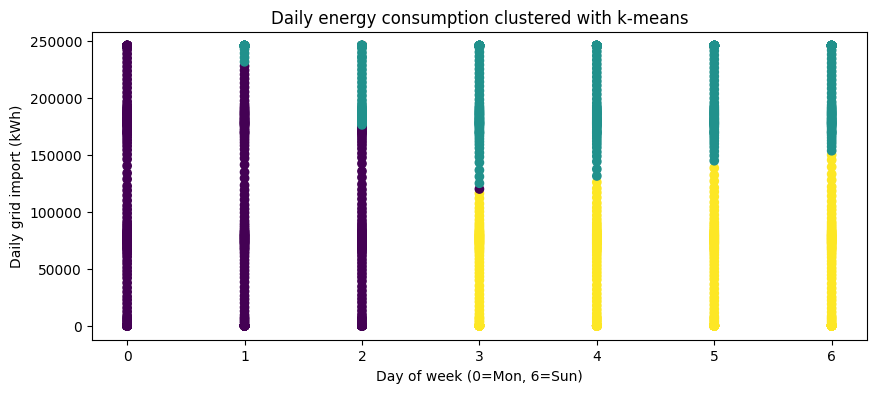

In [ ]:
# TODO: identify the outlier cluster (the one with the fewest days)
# counts = energy_daily['cluster'].value_counts()
# outlier_cluster = counts.idxmin()
# outliers = energy_daily[energy_daily['cluster'] == outlier_cluster]

# TODO: simple scatter plot coloured by cluster
# plt.scatter(...)
# plt.show()

counts = energy_daily["cluster"].value_counts()
print("Cluster sizes:")
print(counts)


outlier_cluster = counts.idxmin()
outliers = energy_daily[energy_daily["cluster"] == outlier_cluster]

print("\nOutlier cluster:", outlier_cluster)
display(outliers.head())

plt.figure()
plt.scatter(
    energy_daily["day_of_week"],
    energy_daily["daily_grid_import_kwh"],
    c=energy_daily["cluster"]
)

plt.xlabel("Day of week (0=Mon, 6=Sun)")
plt.ylabel("Daily grid import (kWh)")
plt.title("Daily energy consumption clustered with k-means")
plt.show()

## 6. Export tidy daily dataset

Export a tidy dataset that will be reused in later challenges, for example with the name:

- `energy_daily_features.csv`

Include at least:

- `date`
- `building_id`
- `building_type`
- `location`
- `daily_grid_import_kwh`
- `cluster` (optional)



In [ ]:
# TODO: export the final tidy dataset for the next challenges
# Example:
# energy_daily.to_csv("energy_daily_features.csv", index=False)

cols_to_export = [
    "date",
    "building_id",
    "building_type",
    "location",
    "daily_grid_import_kwh",
    "cluster",   # optional but useful
]

energy_daily[cols_to_export].to_csv(
    "energy_daily_features.csv",
    index=False
)




KeyError: "['building_type', 'location', 'cluster'] not in index"

# Task
Convert the `daily` Series into a DataFrame named `energy_daily`, resetting the index and renaming columns to `date`, `building_id`, and `daily_grid_import_kwh`. Then, create `building_type` and `location` columns by parsing information from `building_id`, specifically categorizing 'residential', 'industrial', or 'public' for `building_type` and 'urban' or 'suburban' for `location` based on predefined `building_id` patterns. Finally, display the first few rows of the `energy_daily` DataFrame.

In [ ]:
energy_daily = daily.stack().reset_index()
energy_daily = energy_daily.rename(
    columns={
        "utc_timestamp": "date",
        "level_1": "building_id",
        0: "daily_grid_import_kwh",
    }
)

energy_daily["date"] = pd.to_datetime(energy_daily["date"]).dt.date

In [ ]:
def get_building_type(bid):
    if "residential" in bid:
        return "residential"
    elif "industrial" in bid:
        return "industrial"
    elif "public" in bid:
        return "public"
    else:
        return "unknown"

energy_daily["building_type"] = energy_daily["building_id"].apply(get_building_type)

In [ ]:
def get_location(bid):
    if bid in [
        "DE_KN_residential3_grid_import",
        "DE_KN_residential4_grid_import",
        "DE_KN_public1_grid_import",
    ]:
        return "urban"
    elif bid in [
        "DE_KN_residential1_grid_import",
    ]:
        return "suburban"
    else:
        return "unknown"

energy_daily["location"] = energy_daily["building_id"].apply(get_location)


In [ ]:
display(energy_daily.head())

,date,building_id,daily_grid_import_kwh,building_type,location
0,2014-12-11,DE_KN_residential4_grid_import,0.364,residential,urban
1,2014-12-12,DE_KN_residential4_grid_import,1.248,residential,urban
2,2014-12-13,DE_KN_residential4_grid_import,1.248,residential,urban
3,2014-12-14,DE_KN_residential4_grid_import,1.248,residential,urban
4,2014-12-15,DE_KN_residential4_grid_import,1.248,residential,urban


## Convert to Long Format and Rename Columns

### Subtask:
Convert the `daily` Series (which is currently a multi-indexed Series from `.stack()`) into a DataFrame. Reset the index to make `utc_timestamp` and the building identifier into regular columns. Rename the columns to `date`, `building_id`, and `daily_grid_import_kwh` as required.


**Reasoning**:
The subtask requires converting the `daily` Series into a DataFrame, resetting its index, and renaming columns to `date`, `building_id`, and `daily_grid_import_kwh`. I will perform these steps sequentially.



In [ ]:
energy_daily = daily.stack().reset_index()

In [ ]:
energy_daily = energy_daily.rename(
    columns={
        "utc_timestamp": "date",
        "level_1": "building_id",
        0: "daily_grid_import_kwh",
    }
)


In [ ]:
display(energy_daily.head())

,date,building_id,daily_grid_import_kwh
0,2014-12-11 00:00:00+00:00,DE_KN_residential4_grid_import,0.364
1,2014-12-12 00:00:00+00:00,DE_KN_residential4_grid_import,1.248
2,2014-12-13 00:00:00+00:00,DE_KN_residential4_grid_import,1.248
3,2014-12-14 00:00:00+00:00,DE_KN_residential4_grid_import,1.248
4,2014-12-15 00:00:00+00:00,DE_KN_residential4_grid_import,1.248
